In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def clean(l):
    return sorted([i for i in l if i["length"] < 21], key=lambda x: x["length"])
            

In [3]:

from data.home import home0_iterswa_hpd_0414, home_iter_hps_env0_ermmixupcoral

from data64.home import home0_itersoup_emvc_hps_0415
from data64.home import home0_iterswa_erm_hps_0415, home0_itersoup_erm_hps_fulls_0420

#l_swa = clean(home0_iterswa_hpd_0414.lswa)
l_swa = clean(home0_iterswa_erm_hps_0415.lswa)
#l_emvc = clean(home_iter_hps_env0_ermmixupcoral.lermmixupcoral)
#l_emvc = clean(home0_itersoup_emvc_hps_0415.lermmixupcoral)

l_erm = clean(home_iter_hps_env0_ermmixupcoral.lerm)
l_erm_fulls = clean(home0_itersoup_erm_hps_fulls_0420.lerm)

In [10]:
from data64.home import home0_itersoup_erm_hps_0418
from data64.home import home0_iterswa_erm_hps_0415

l_erm = clean(home0_itersoup_erm_hps_0418.lerm)
l_swa = clean(home0_iterswa_erm_hps_0415.lswa)

In [4]:
from codeplot.plot import *

In [11]:
def plot_iter_soupacc(key1, order=1, do_ens=False, do_soup=True, ood=False):
    if ood:
        dict_key_to_limit = {"soup": [0.610, 0.69]}
    else:
        dict_key_to_limit = {"soup": [0.834, 0.87]}

    fig = plt.figure()
    if do_ens:
        if ood:
            _dict_key_to_label = dict_key_to_label_net_ood
        else:
            _dict_key_to_label = dict_key_to_label_net_iid
    else:
        _dict_key_to_label = dict_key_to_label
    plt.xlabel(_dict_key_to_label.get(key1, key1), fontsize="x-large")
    plt.ylabel(_dict_key_to_label.get("soup", "soup"), fontsize="x-large")

    colors = cm.rainbow(np.linspace(0.3, 1, 4))

    def plot_with_int(l, color, label, key2, marker, linestyle):
        t = get_x(l, key1)
        if t == []:
            return

        l = [ll for ll in l if key2 in ll]
        plt.scatter(
            get_x(l, key1),
            get_x(l, key2),
            color=color,
            label=label if order != 1 else None,
            marker=marker
        )
        fit_and_plot(key1, key2, l, order, label, color, linestyle=linestyle)
    _l_erm = l_erm_fulls if False and ood else l_erm
    if do_soup:

        plot_with_int(
            _l_erm,
            color=colors[0],
            label="DWA: $\\{\\theta_m\\}_1^M$ from different runs",
            key2="soup" if ood else "train_soup",
            marker=".",
            linestyle="-"
        )
    if do_ens:
        plot_with_int(
            _l_erm,
            color=colors[1],
            label="Ens: $\\{\\theta_m\\}_1^M$ from different runs",
            key2="net" if ood else "train_net",
            marker="x",
            linestyle="--"
        )

    if do_soup:
        plot_with_int(
            l_swa,
            color=colors[2],
            label="WA: $\\{\\theta_m\\}_1^M$ from one single run",
            key2="soup" if ood else "train_soup",
            marker=".",
            linestyle="-"
        )
    if do_ens:
        plot_with_int(
            l_swa,
            color=colors[3],
            label="Ens: $\\{\\theta_m\\}_1^M$ from one single run",
            key2="net" if ood else "train_net",
            marker="x",
            linestyle="--"
        )
    #plot_with_int(liter_hpl.lswa, color=colors[0], label="Ens: $\\{\\theta_m\\}_1^M$ from a single ERM run", key2="net")

    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if "soup" in dict_key_to_limit:
        plt.ylim(dict_key_to_limit["soup"])
    plt.legend(fontsize="x-large")
    return fig

In [12]:
dict_key_to_label["length"]

'M (number of networks)'

In [13]:
dict_key_to_label_net_ood = {"soup": "Test OOD Accuracy", "length": dict_key_to_label["length"]}
dict_key_to_label_net_iid = {"soup": "Test IID Accuracy", "length": dict_key_to_label["length"]}

In [14]:
import matplotlib.pyplot as plt


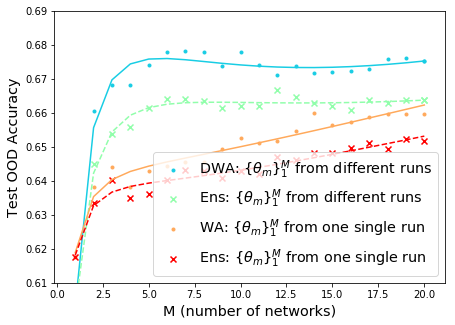

In [16]:
plt.rcParams["figure.figsize"] = (7,5)

fig = plot_iter_soupacc("length", order="3log",do_ens=True, do_soup=True, ood=True, )
#save_fig(fig, "samediffruns_m_soup_net_ood.png")

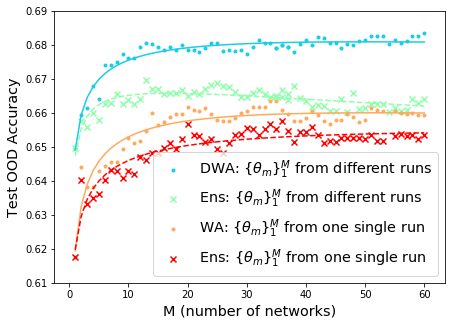

In [15]:
plt.rcParams["figure.figsize"] = (7,5)

fig = plot_iter_soupacc("length", order="2log",do_ens=True, do_soup=True, ood=True, )
#save_fig(fig, "samediffruns_m_soup_net_ood.png")

In [ ]:
plt.rcParams["figure.figsize"] = (7,5)

fig = plot_iter_soupacc("length", order="2log",do_ens=True, do_soup=True, ood=False, )
save_fig(fig, "samediffruns_m_soup_net_iid.png")

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
fig = plot_iter_soupacc("length", order="2log",do_ens=False, do_soup=True, ood=True)
save_fig(fig, "samediffruns_m_soup_ood.png")

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
fig = plot_iter_soupacc("length", order="2log",do_ens=True, do_soup=True, ood=True)

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)
fig = plot_iter_soupacc("length", order="2log",do_ens=True, do_soup=True, ood=True)

In [ ]:
fig = plot_iter_soupacc("length", order="2log",dict_key_to_limit=dict_key_to_limit)

In [ ]:
plot_iter("length", "soupswa", order="",)

In [ ]:
plot_iter("length", "soup", order="2log")

In [ ]:
def plot_soup_soupswa(key1, keys2, order=1):
    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label["soup"])

    def plot_with_int(l, color, label, key2):
        t = x(l, key1)
        if t == []:
            return
        plt.scatter(x(l, key1), get_x(l, key2), color=color, label=label if order != 1 else None)
        fit_and_plot(key1, key2, l, order, label, color)


    colors = ["blue", "yellow"]
    labels = [
        "SOUP: $\\{\\theta_m\\}_1^M$ last checkpoints from different runs",
        "SOUPSWA: $\\{\\theta_m\\}_1^M$ SWA from different runs"
    ]
    #plot_with_int(l0, color="grey", key2="soup", label="swa")
    for  i, key2 in enumerate(keys2):
        plot_with_int(l2, key2=key2, color=colors[i], label=labels[i])

    plt.legend()

In [ ]:
plot_soup_soupswa("length", keys2=["soup", "soupswa"], order=2)

In [ ]:
plot_soup_soupswa("length", keys2=["soup", "soupswa"], order=2)

In [ ]:
plot_soup_soupswa("length", keys2=["hess", "thess"], order="2log")

In [ ]:
plot_key_swa("length", keys2=["soup", "soupswa"], order="2log")

In [ ]:
plot_key("length", "thess", order="2log")

In [ ]:
plot_key("thess", "soup")

In [ ]:
plot_key("length", "hess", order="2log")